In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [4]:
df = pd.read_csv("C:\\Users\\sanja\\Downloads\\medical_cost.csv")
df = df.drop(columns=['Id'], axis=1)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
new_df = pd.get_dummies(df, columns=['sex', 'smoker','region'])
new_df

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


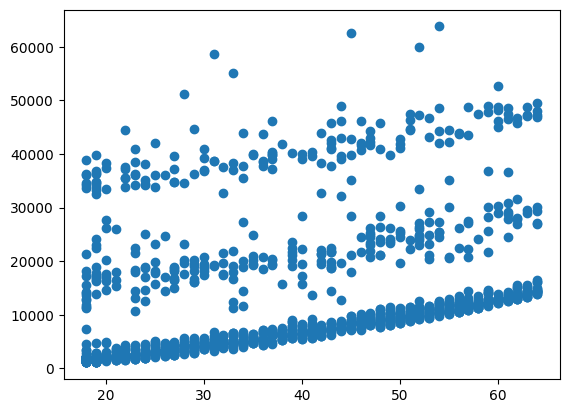

In [7]:
plt.scatter(x="age", y="charges", data=new_df)

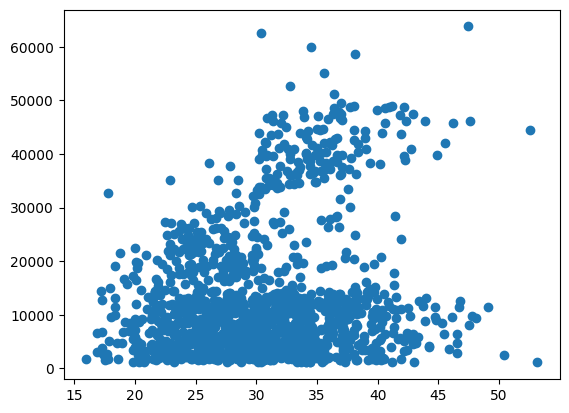

In [10]:
plt.scatter(x="bmi", y="charges", data=new_df)

In [15]:
new_df.corr()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,0.020856,-0.020856,0.025019,-0.025019,0.002475,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,-0.046371,0.046371,-0.003750,0.003750,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,-0.017163,0.017163,-0.007673,0.007673,-0.022808,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,-0.057292,0.057292,-0.787251,0.787251,0.006349,-0.039905,0.073982,-0.043210
sex_female,0.020856,-0.046371,-0.017163,-0.057292,1.000000,-1.000000,0.076185,-0.076185,0.002425,0.011156,-0.017117,0.004184
sex_male,-0.020856,0.046371,0.017163,0.057292,-1.000000,1.000000,-0.076185,0.076185,-0.002425,-0.011156,0.017117,-0.004184
smoker_no,0.025019,-0.003750,-0.007673,-0.787251,0.076185,-0.076185,1.000000,-1.000000,-0.002811,0.036945,-0.068498,0.036945
smoker_yes,-0.025019,0.003750,0.007673,0.787251,-0.076185,0.076185,-1.000000,1.000000,0.002811,-0.036945,0.068498,-0.036945
region_northeast,0.002475,-0.138156,-0.022808,0.006349,0.002425,-0.002425,-0.002811,0.002811,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,0.011156,-0.011156,0.036945,-0.036945,-0.320177,1.000000,-0.346265,-0.320829


In [12]:
X = new_df.drop(columns=['charges'], axis=1)
y = new_df['charges']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [18]:
print(X_train.shape)
print(X_test.shape)

(1070, 11)
(268, 11)


In [37]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_predicted = lr.predict(X_test)
print(lr.coef_)
print(lr.intercept_)
print(r2_score(y_test,y_predicted))
np.sqrt(mean_squared_error(y_test,y_predicted))

[   251.22566407    332.82271398    587.9253102      18.56120037
    -18.56120037 -11956.17261513  11956.17261513    527.72812674
    148.53816329   -256.75623287   -419.51005716]
-349.3703869501496
0.7449415564623685


6189.092934242136

In [34]:
r2 = r2_score(y_test,y_predicted)
adj_r2 = 1 -  (1-r2)*(1-X_train.shape[0])/(1-X_train.shape[0]-len(X_train.columns))
adj_r2

0.7475393739428444

In [51]:
import statsmodels.api as sm

In [49]:
X_train_new = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_new).fit()
model.summary()

In [50]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     402.2
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          5.88e-315
Time:                        16:23:14   Log-Likelihood:                -10828.
No. Observations:                1070   AIC:                         2.167e+04
Df Residuals:                    1061   BIC:                         2.172e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -155.2757    487.343     -0.319      0.750   -1111.541     800.990
age                251.2257     13.421     18.719      0.000     224.891     277.561
bmi                332.8227     32.213     10.332      0.000     269.614     396.031
children           587.9253    153.458      3.831      0.000     286.810     889.041
sex_female         -59.0767    297.586     -0.199      0.843    -643.000     524.847
sex_male           -96.1991    314.762     -0.306      0.760    -713.825     521.427
smoker_no        -1.203e+04    317.544    -37.897      0.000   -1.27e+04   -1.14e+04
smoker_yes        1.188e+04    351.189     33.824      0.000    1.12e+04    1.26e+04
region_northeast   488.9092    334.613      1.461      0.144    -167.669    1145.488
region_northwest   109.7192    337.145      0.325      0.745    -551.828     771.266
region_southeast  -295.5752    366.574     -0.806      0.420   -1014.867     423.717
region_southwest  -458.3290    348.670     -1.315      0.189   -1142.490     225.832
==============================================================================
Omnibus:                      241.237   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              580.065
Skew:                           1.203   Prob(JB):                    1.10e-126
Kurtosis:                       5.687   Cond. No.                     6.66e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.38e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [65]:
X_test = X_test.drop(columns=['sex_female','sex_male','region_northeast','region_northwest','region_southeast','region_southwest'], axis=1)

In [66]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_predicted = lr.predict(X_test)
print(lr.coef_)
print(lr.intercept_)
print(r2_score(y_test,y_predicted))
np.sqrt(mean_squared_error(y_test,y_predicted))

[   251.88600801    319.74163163    586.80841732 -11949.23538127
  11949.23538127]
13.09762789895467
0.7428465156903339


6214.459442927315

In [67]:
X_train_new = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_new).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     803.6
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          8.87e-320
Time:                        16:37:52   Log-Likelihood:                -10830.
No. Observations:                1070   AIC:                         2.167e+04
Df Residuals:                    1065   BIC:                         2.170e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.7318    711.324      0.012      0.990   -1387.024    1404.487
age          251.8860     13.409     18.785      0.000     225.575     278.197
bmi          319.7416     30.739     10.402      0.000     259.425     380.058
children     586.8084    153.259      3.829      0.000     286.084     887.532
smoker_no  -1.194e+04    399.424    -29.905      0.000   -1.27e+04   -1.12e+04
smoker_yes  1.195e+04    444.992     26.863      0.000    1.11e+04    1.28e+04
==============================================================================
Omnibus:                      240.025   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              571.248
Skew:                           1.202   Prob(JB):                    9.02e-125
Kurtosis:                       5.652   Cond. No.                     1.37e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.5e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [55]:
rr = Ridge(alpha=0.05)
rr.fit(X_train, y_train)
y_predicted = rr.predict(X_test)
print(rr.coef_)
print(rr.intercept_)
print(r2_score(y_test,y_predicted))
np.sqrt(mean_squared_error(y_test,y_predicted))

[   251.22341637    332.81577817    587.92006104     18.46299315
    -18.46299315 -11954.44069604  11954.44069604    527.6193019
    148.42000154   -256.57184144   -419.46746202]
-350.09395860907716
0.7449439856729048


6189.063461299867

In [60]:
las = Lasso(alpha=0.01)
las.fit(X_train, y_train)
y_predicted = las.predict(X_test)
print(las.coef_)
print(las.intercept_)
print(r2_score(y_test,y_predicted))
np.sqrt(mean_squared_error(y_test,y_predicted))
r2 = r2_score(y_test,y_predicted)
adj_r2 = 1 -  (1-r2)*(1-X_train.shape[0])/(1-X_train.shape[0]-len(X_train.columns))
print(adj_r2)

[ 2.51225608e+02  3.32822323e+02  5.87918175e+02  3.70780482e+01
 -0.00000000e+00 -2.39122818e+04  1.98090254e-11  8.01775346e+02
  4.22572214e+02  1.72722040e+01 -1.45419863e+02]
11314.185093295095
0.744941689758025
0.7475395058808599


In [61]:
el = ElasticNet(alpha=0.01, l1_ratio=0.5)
el.fit(X_train, y_train)
y_predicted = el.predict(X_test)
print(el.coef_)
print(el.intercept_)
print(r2_score(y_test,y_predicted))
np.sqrt(mean_squared_error(y_test,y_predicted))
r2 = r2_score(y_test,y_predicted)
adj_r2 = 1 -  (1-r2)*(1-X_train.shape[0])/(1-X_train.shape[0]-len(X_train.columns))
print(adj_r2)

[ 2.50988291e+02  3.32100412e+02  5.87334572e+02  8.32245576e+00
 -8.28507759e+00 -1.17741311e+04  1.17732119e+04  5.16352426e+02
  1.36316354e+02 -2.37576898e+02 -4.14936758e+02]
-425.4033686016646
0.7450584777144718
0.7476551043303429
